# **1. Exploratory Data Analysis**

## **1.1. Loading the dataset**

In [2]:
import pandas as pd
from os.path import isdir
from os import getcwd
from os import mkdir


if not isdir(f'{getcwd()}/../plots'):
    mkdir(f'{getcwd()}/../plots')
if not isdir(f'{getcwd()}/../models'):
    mkdir(f'{getcwd()}/../models')
if not isdir(f'{getcwd()}/../datasets'):
    mkdir(f'{getcwd()}/../datasets')

dataset = pd.read_csv(f'{getcwd()}/../datasets/teste_indicium_precificacao.csv')

# Renaming the columns for plotting graphs
dataset = dataset.rename(columns={
    'id': 'ID',
    'nome': 'Name',
    'host_id': 'Host ID',
    'host_name': 'Host Name',
    'bairro_group': 'Neighborhood',
    'bairro': 'District',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'room_type': 'Room Type',
    'price': 'Price',
    'minimo_noites': 'Minimum Nights',
    'numero_de_reviews': 'Reviews',
    'ultima_review': 'Last Review',
    'reviews_por_mes': 'Monthly Reviews',
    'calculado_host_listings_count': 'Number of Listings',
    'disponibilidade_365': "Days Available"
})

## **1.2. Graphs by district**

- Manhattan and Brooklyn on average, have the most expensive princes and least availability;
- This corresponds with the the reputation from the boroughs, which are one of the most populous and visited in NY;
- On the other hand, Staten Island is one of the most unknown borough, which direct affects instances located there, reducing the average price and increasing availability.

In [3]:
import plotly.express as px

df = dataset.copy()

districts = df["Neighborhood"].unique()
neighbor = df[df["Neighborhood"].isin(districts)]

graph1 = neighbor.groupby(('Neighborhood'))[['Price']].mean().reset_index()
fig1 = px.bar(graph1, x='Neighborhood', y='Price', color='Neighborhood', title="Average price per district")
fig1

In [4]:
graph2 = neighbor.groupby(('Neighborhood'))[['Days Available']].mean().reset_index()
fig2 = px.bar(graph2, x='Neighborhood', y='Days Available', color='Neighborhood', title='Average availability per district')
fig2

## **1.3. Graphs by room type**

- Although shared rooms' average availability is high, the percentage of that room type present in the boroughs compared to the others is minimal (2,3% approximately);
- On the other hand, Private rooms have a considerable margin as the most expensive one in average, which coincides with it corresponding to more than 70% of the total receipt.

In [5]:
room_type = df["Room Type"].unique()
rooms = df[df["Room Type"].isin(room_type)]

graph3 = rooms.groupby(('Room Type'))[['Price']].mean().reset_index()
fig3 = px.bar(graph3, x='Room Type', y='Price', color='Room Type', title="Average price per room type")
fig3

In [6]:
graph4 = rooms.groupby(('Room Type'))[['Days Available']].mean().reset_index()
fig4 = px.bar(graph4, x='Room Type', y='Days Available', color='Room Type', title="Average availability per room type")
fig4

In [7]:
graph5 = df.groupby('Room Type')[['Price']].sum().reset_index()
fig5 = px.pie(graph5, values='Price', names='Room Type', title='Total receipt by room type')
fig5

## **1.4. Graphs by reviews**

- No large discrepancies looking at monthly reviews per borough, although curiously the most expensive and famous ones (Manhattan and Brooklyn) have the least amounts;
- Considering minimum nights though, Manhattan has in average many more required to rent;
- Entire homes/apartments in general also require a higher amount of minimum nights as opposed to shared or private rooms.

In [8]:
graph6 = df.groupby(('Neighborhood'))[['Monthly Reviews']].mean().reset_index()
fig6 = px.bar(graph6, x='Neighborhood', y='Monthly Reviews', color='Neighborhood', title="Average montlhy reviews per district")
fig6

In [9]:
graph7 = df.groupby(['Neighborhood', 'Room Type'])[['Minimum Nights']].mean().reset_index()
fig7 = px.bar(graph7, x='Neighborhood', y='Minimum Nights', color='Room Type', title="Average minimum nights required")
fig7

## **1.5. Relationship between minimun nights, availability and price (Question 2.b.)**

- Due to the presence of outliers and dispersion of the data, there's no immediate visible correlation between the price and minimum nights or availability;
- The correlation matrix enforces this statement, as these features correlation values are close to zero (neutral correlation).

In [10]:
graph8 = df.groupby(['Minimum Nights'])[['Price']].mean().reset_index()
fig8 = px.bar(graph8, x='Minimum Nights', y='Price', title="Average price by minimum nights required")

fig8

In [11]:
graph9 = df.groupby(['Days Available'])[['Price']].mean().reset_index()
fig9 = px.bar(graph9, x='Days Available', y='Price', title="Average price by availability")

fig9

<ipython-input-3-71588a02c984>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = features.corr()


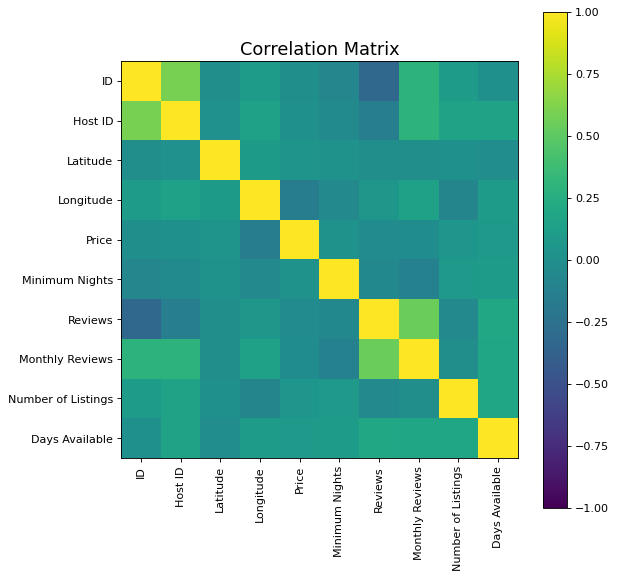

In [3]:
import matplotlib.pyplot as plt

features = dataset.copy()

# Remove rows which have any missing value in its features
features = features.dropna(axis='index')
features = features[[col for col in features if features[col].nunique() > 1]]

if features.shape[1] < 2:
    exit()

corr = features.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corr_mat = plt.matshow(corr, fignum=1)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corr_mat)

# -1: weak relationship | 0: neutral relationship | 1: strong relationship
plt.clim(-1, 1)
plt.title(f'Correlation Matrix', fontsize=16)

plt.show()

- Price target has some extreme outliers as shown at the boxplot, whose can affect negatively the ML model;
- Strategies to deal with this problem will have to proposed (deletion, binning, ...).

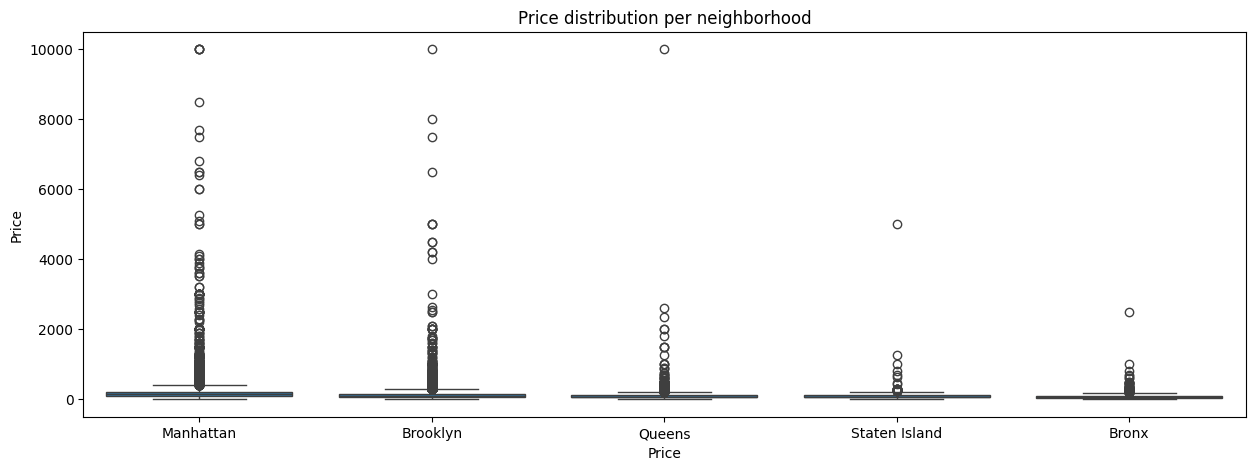

In [4]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(15, 5))
sns.boxplot(ax=axes, x='Neighborhood', y='Price', data=dataset)

axes.set_title('Price distribution per neighborhood')
axes.set_xlabel('Neighborhood')
axes.set_xlabel('Price')
plt.show()

## **1.6. Patterns in local name text (Question 2.c.)**

- Cheaper instances tends to focus more on general characteristics such as {clean, quiet, apartment, private room, ...}, which can be seen in the first word cloud;
- More Expensive ones tends to present extra aesthetic characteristics such as {luxury, modern, spacious, beautiful, modern, cozy, ...}, which can be seen in the second word cloud.

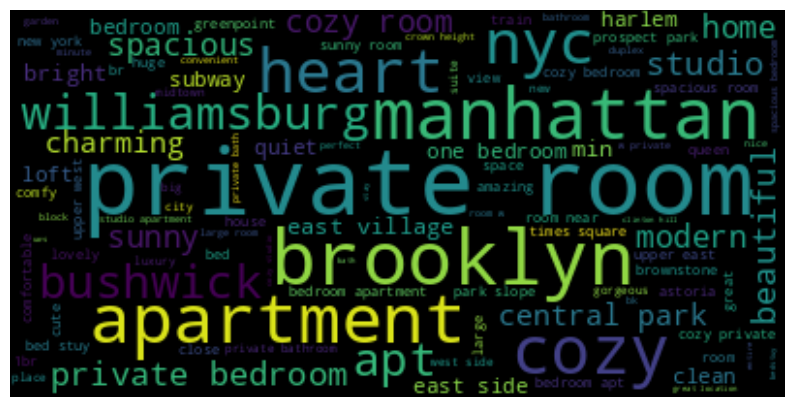

In [14]:
from wordcloud import WordCloud

# Get rows below the global price mean
low_df = dataset[dataset['Price'] < dataset['Price'].mean()]

text = ' '.join(str(n).lower() for n in low_df['Name'])
wordcloud = WordCloud(max_words=100, background_color='black').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

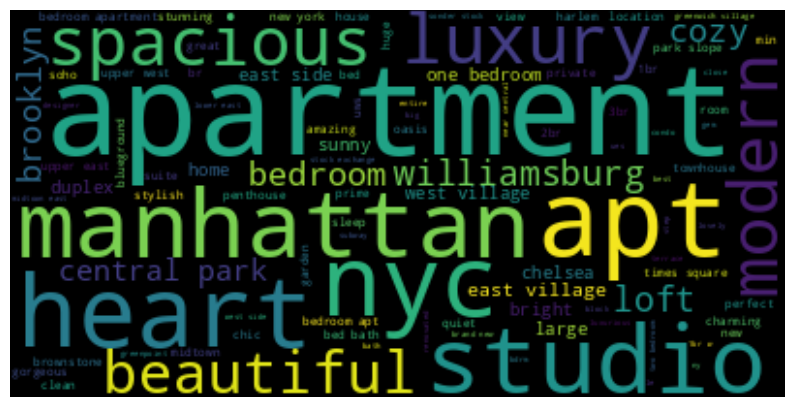

In [15]:
high_df = dataset[dataset['Price'] > dataset['Price'].mean()]

text = ' '.join(str(n).lower() for n in high_df['Name'])
wordcloud = WordCloud(max_words=100, background_color='black').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **2. Preprocessing**

## **2.1. Categorical values, scaling and irrelevant features**

- As some first statistical impressions of the dataset:

    - The columns {Price, Reviews, Monthly Reviews} have heavy outliers;
    - The columns {ID, Name} have a large amount of unique values (possibly irrelevant information to the model -> low predictive power);
    - The columns {Host Name, Last Review, Monthly Reviews} have a reasonable amount of missing values, which can be inputed with an ML algorithm as an intermediate.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


def discretize_values(df: pd.DataFrame, column: str) -> pd.DataFrame:

    '''Encondes entire columns of categorical data'''
    encoding = LabelEncoder()

    encoding.fit(df[column])
    df[column] = encoding.transform(df[column])

    return df


def normalization(df: pd.DataFrame) -> pd.DataFrame:

    attr_scaler = StandardScaler()
    return attr_scaler.fit_transform(df)


preprocess = dataset.copy()
features = preprocess.columns.values

for feat in features:
    if preprocess[feat].dtype == int or preprocess[feat].dtype == float:
        print(preprocess[feat].describe())
        print('\n')

print(preprocess.nunique())
print('\n')
print(preprocess.isnull().sum())

for feat in features:
    proportion = round(len(preprocess[feat].unique()) / len(preprocess[feat]), 2)

    # Discard a column if it has more than 90% of unique values
    if proportion * 100 > 90:
        preprocess = preprocess.drop([feat], axis='columns')

count    4.889400e+04
mean     1.901753e+07
std      1.098288e+07
min      2.595000e+03
25%      9.472371e+06
50%      1.967743e+07
75%      2.915225e+07
max      3.648724e+07
Name: ID, dtype: float64


count    4.889400e+04
mean     6.762139e+07
std      7.861118e+07
min      2.438000e+03
25%      7.822737e+06
50%      3.079553e+07
75%      1.074344e+08
max      2.743213e+08
Name: Host ID, dtype: float64


count    48894.000000
mean        40.728951
std          0.054529
min         40.499790
25%         40.690100
50%         40.723075
75%         40.763117
max         40.913060
Name: Latitude, dtype: float64


count    48894.000000
mean       -73.952169
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936273
max        -73.712990
Name: Longitude, dtype: float64


count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.0

## **2.2. Inputing missing values with machine learning**

- The columns {Host Name, Last Review, Monthly Reviews} least than 30% of missing values, making it reasonable to apply a ML to predict them;
- The model applied will be a classification one, since these features values are either categorical or integers.

*Careful with this module, columns that have many unique values may take long
to predict and be memory intensive (Host ID column - 11452 labels - 12 GB RAM)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


def fit_model(df, algorithm, training, y_training, rows_to_predict, raw_rows, column) -> pd.DataFrame:

    normalized = normalization(df=training)

    algorithm.fit(normalized, y_training[column])
    predictions = algorithm.predict(normalization(df=rows_to_predict))
    raw_rows[column] = predictions

    # Reappends the recent predicted rows to the original dataset without changing order
    return pd.concat([df, raw_rows], sort=False).sort_index()


def regression_fill(df: pd.DataFrame, column: str) -> pd.DataFrame:

    '''For real values uses Linear Regression to predict missing values'''
    fill_data = df[df[column].isnull()]
    rows_to_predict = fill_data.drop([column], axis='columns')
    raw_rows = rows_to_predict.copy()

    # Discards rows where the selected column has missing value
    df = df.dropna(axis='index', subset=column)
    features = df.drop([column], axis='columns')
    y_training = discretize_values(df, column)

    # Encodes categorical data
    training = features.copy()
    for col in features.columns.values:
        training = discretize_values(df=training, column=col)
        rows_to_predict = discretize_values(df=rows_to_predict, column=col)

    lr_model = LinearRegression()
    concat_df = fit_model(df=df, algorithm=lr_model, training=training,
                          y_training=y_training, rows_to_predict=rows_to_predict,
                          raw_rows=raw_rows, column=column)

    return concat_df


def classification_fill(df: pd.DataFrame, column: str) -> pd.DataFrame:

    '''For integer or categorical values uses Decistion Tree classifier to predict missing values'''
    fill_data = df[df[column].isnull()]
    rows_to_predict = fill_data.drop([column], axis='columns')
    raw_rows = rows_to_predict.copy()

    df = df.dropna(axis='index', subset=column)
    features = df.drop([column], axis='columns')
    y_training = discretize_values(df, column)

    training = features.copy()
    for col in features.columns.values:
        training = discretize_values(df=training, column=col)
        rows_to_predict = discretize_values(df=rows_to_predict, column=col)

    dt_model = DecisionTreeClassifier()
    concat_df = fit_model(df=df, algorithm=dt_model, training=training,
                          y_training=y_training, rows_to_predict=rows_to_predict,
                          raw_rows=raw_rows, column=column)

    return concat_df


def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:

    '''
    Fills missing values by predicting based on existing data
    It only applies this method if a column has at maximum 30% of its values missing
    '''
    features = df.columns.values
    for feat in features:
        if df[feat].isnull().sum() > 0 and df[feat].isnull().sum() / len(df[feat]) < 0.3:

            if df[feat].dtype == float:
                df = regression_fill(df=df, column=feat)
            else:
                df = classification_fill(df=df, column=feat)

    return df

### **2.2.1. Reducing feature's cardinality**

- The Last Review column cardinality will be reduced by filtering the date only by year and month, discarding _day_ as little rrelevant, and raising the "pattern level" on the dataset to possibly enhance models' perfomance.

In [7]:
import numpy as np

model_features = preprocess.drop(['Price'], axis='columns')

'''
Reduces the amount of unique values in Last Review column
Filters now only by year and month, discarding the day as irrelevant data
'''
model_features['Last Review'] = pd.to_datetime(model_features['Last Review'])
model_features['Last Review'] = model_features['Last Review'].apply(lambda row: f'{str(row.year)}-{str(row.month)}')
model_features = model_features.replace({'Last Review': {'nan-nan': np.nan}})

model_classes = preprocess['Price']

In [9]:
from warnings import filterwarnings

filterwarnings('ignore')
preprocess = fill_missing_values(df=model_features)
preprocess['Price'] = model_classes

- Now the dataset doesn't have missing values anymore, with the amount of labels in the 'Last Review' column reduced and discarding 'ID' and 'Name' features.

In [10]:
print(preprocess.isnull().sum())
print(preprocess.nunique())
print(preprocess.shape)

preprocess.to_csv(f'{getcwd()}/../datasets/filled.csv', index=False)

Host ID               0
Host Name             0
Neighborhood          0
District              0
Latitude              0
Longitude             0
Room Type             0
Minimum Nights        0
Reviews               0
Last Review           0
Monthly Reviews       0
Number of Listings    0
Days Available        0
Price                 0
dtype: int64
Host ID               37457
Host Name             11452
Neighborhood              5
District                221
Latitude              19048
Longitude             14718
Room Type                 3
Minimum Nights          109
Reviews                 394
Last Review              92
Monthly Reviews       10988
Number of Listings       47
Days Available          366
Price                   674
dtype: int64
(48894, 14)


## **2.3. Removing outliers, equal frequency binning and discretization**

- The Price column has some extreme outliers, therefore we'll discard rows which prices are not between the first and third quantiles (good for squewed data), concentrating the most uniform distributed data.
- The columns {Host Name, Host ID, Latitude, Longitude} have either heavy outliers or a large interval of values;
- Therefore, we can agroup this features with approximately the same size for each one and encapsulate these intervals.

In [13]:
def remove_outliers(df, col, th1=0.25, th3=0.75):

    q1 = df[col].quantile(th1)
    q3 = df[col].quantile(th3)

    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]
    return df

# Gets the bins to apply preprocessing on the example later
bins = dict()
n_bins = pd.qcut(preprocess['Host Name'], q=15, retbins=True)
bins['Host Name'] = n_bins[1]
n_bins = pd.qcut(preprocess['Host ID'], q=80, retbins=True)
bins['Host ID'] = n_bins[1]
n_bins = pd.qcut(preprocess['Latitude'], q=25, retbins=True)
bins['Latitude'] = n_bins[1]
n_bins = pd.qcut(preprocess['Longitude'], q=25, retbins=True)
bins['Longitude'] = n_bins[1]

# Remove outlier rows based on price (first and third quantiles)
preprocess = remove_outliers(preprocess, 'Price')

# Equal frequency binning on scattered features
categorical_size = [x for x in range(15)]
preprocess['Host Name'] = pd.qcut(preprocess['Host Name'], q=15, labels=categorical_size)

categorical_size = [x for x in range(80)]
preprocess['Host ID'] = pd.qcut(preprocess['Host ID'], q=80, labels=categorical_size)

categorical_size = [x for x in range(25)]
preprocess['Latitude'] = pd.qcut(preprocess['Latitude'], q=25, labels=categorical_size)

categorical_size = [x for x in range(25)]
preprocess['Longitude'] = pd.qcut(preprocess['Longitude'], q=25, labels=categorical_size)

# Discretize categorical features
for col in preprocess.columns.values:
    if preprocess[col].dtypes != int and preprocess[col].dtypes != float:
        preprocess = discretize_values(df=preprocess, column=col)

preprocess.to_csv(f'{getcwd()}/../datasets/preprocessed.csv', index=False)

# **3. Machine Learning**

## **3.1. First impressions with different models**

- In all models, the standard deviation is relatively low, which is always a good measure when it comes to evaluating ML models scores;
- The R²* metric though isn't that great, which can lead us to return to the preprocessing step (feature selection, feature engineering, more EDAs, ...);
- We'll ignore some of that for now, and progress to feature selection and fine tuning.

*R² ranges from 0 to 1, with values close to 0 meaning unsatisfactory model's performance (distant predictions), and vice versa.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


model_features = preprocess.drop(['Price'], axis='columns')
model_classes = preprocess['Price']

# imputer = SimpleImputer(strategy='median', missing_values=np.nan)
scaler = StandardScaler()

lr_pipeline = Pipeline(steps=[
    # ('imputer', imputer),
    ('scaler', scaler),
    ('regressor', LinearRegression())
])

knn_pipeline = Pipeline(steps=[
    # ('imputer', imputer),
    ('scaler', scaler),
    ('regressor', KNeighborsRegressor(n_jobs=-1))
])

xgb_pipeline = Pipeline(steps=[
    # ('imputer', imputer),
    ('scaler', scaler),
    ('regressor', XGBRegressor(n_jobs=-1))
])

lgbm_pipeline = Pipeline(steps=[
    # ('imputer', imputer),
    ('scaler', scaler),
    ('regressor', LGBMRegressor(n_jobs=-1, verbose=-1))
])

pipelines = {'Linear Regression': lr_pipeline, 'KNN': knn_pipeline, 'XGBoost': xgb_pipeline, 'LighGBM': lgbm_pipeline}

# 10-fold cross-validation
for key in pipelines:
    scores = cross_val_score(
        estimator=pipelines[key],
        X=model_features,
        y=model_classes,
        cv=10,
        scoring='r2'
    )
    print(key)
    print(f'R² Mean: {scores.mean()}')
    print(f'R² Std: {scores.std()}\n')

Linear Regression
R² Mean: 0.4698102841046552
R² Std: 0.036334234867511875

KNN
R² Mean: 0.4587697874150458
R² Std: 0.04963544671267699

XGBoost
R² Mean: 0.5481779335379237
R² Std: 0.045997855398734196

LighGBM
R² Mean: 0.5637175553455711
R² Std: 0.03737920328065647



## **3.2. Basic fine tuning with few parameters and ranges**


In [19]:
from sklearn.model_selection import GridSearchCV


'''Computationally expensive'''

def fine_tuning(attributes, classes, algorithm, param_grid):

    grid_search = GridSearchCV(estimator=regressor,
                               param_grid=param_grid,
                               scoring="r2",
                               n_jobs=-1,
                               cv=5,
                               verbose=0,
                               return_train_score=True)
    grid_search.fit(attributes, classes)

    print(grid_search.best_params_)
    with open(f'{getcwd()}/../models/{algorithm}_best_params.txt', 'w') as file:
        for key in grid_search.best_params_:
            file.write(f'{key}: {grid_search.best_params_[key]}\n')

In [2]:
regressor = LGBMRegressor(n_jobs=-1)
param_grid = [{
    'n_estimators': [n for n in range(49, 350, 100)],
    'max_depth': [d for d in range(3, 20, 3)],
    'learning_rate': [r for r in np.arange(0.01, 0.5, 0.1)]
}]

fine_tuning(model_features, model_classes, regressor, param_grid)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 45917, number of used features: 13
[LightGBM] [Info] Start training from score 119.946382
{'learning_rate': 0.11, 'max_depth': 18, 'n_estimators': 149}


In [5]:
regressor = XGBRegressor(n_jobs=-1)
param_grid = [{
    'n_estimators': [n for n in range(50, 350, 100)],
    'max_depth': [d for d in range(3, 20, 3)],
    'learning_rate': [r for r in np.arange(0.01, 0.5, 0.1)]
}]

fine_tuning(model_features, model_classes, regressor, param_grid)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


{'learning_rate': 0.11, 'max_depth': 6, 'n_estimators': 50}


## **Question 3. Data Mining**

- The most basic preprocessing step applied to the dataset, was to discard columns which have more than 90% of data encoded as unique values. ML models tend to perform better if there's some recurrent pattern in the data. Columns which have many unique values (e.g., ID), don't present relevant information on predictions. By applying this methodology, the columns _id_ and _name_ were removed.

- The second step was to remove outliers from the dataset by analyzing the price. Instances which had prices below the first quantile (25%) and above the third quantile (75%) were removed to reduce the amount of "noisy" data, which could increase variance.

- Then, it was applied equal frequency binning on some columns from the dataset. The main property that these selected columns had in common was the high amount of unique values next to a large interval between minimum and maximum values. By applying this method, we can reduce the interval containing the data, along with grouping sets with approximately the same number of rows whithin a range in common. The columns selected to apply this operation were: {host_name, host_id, latitude, longitude}.

- The most complex step of preprocessing was dealing with missing values. Instead of using classical strategies such as discarding entire rows or inputing mean or median of a selected row, I opted for using simple ML algorithms (classification and regression) as intermediates. Since all columns with missing values has at least 70% of the data complete, I predicted the missing values with a ML model using the complete rows to train it. Although this strategy can be costly if a column has a large amount of unique values (curse of dimensionality), the results can be quite decent to enhance the final model's predictive power. This can aggregate relevant information to the model, instead of only adding redundant data to fulfill the dataset. It's extremely important though, to analyze the amount of distinct variables and the percentage of the data that is missing to successfully apply such technique.

- Finally the final preprocessing step was just encoding categorical data and scaling it. Categorical data was encoded by just dicretizing the values ({'Private room', 'Shared room', 'Entire home/apt'} ==> {0, 1, 2}). This can introduce some false suggestion of order or priority, which can deceive the ML algorithm on training. To bypass this drawback, the entire dataset is submitted to a scaling process with Z-Score, which "maps" the values in a normal distribution, packing all the values in a standard interval.

- We're dealing with a regression problem, since the output object of interest (in this case, the price predicted) is a continuous variable. Continuous variables have an infinite amount of values between an interval, and thus cannot be counted. In a classification problem, the output variable is discrete and finite in an interval, such as determining if an URL is malicious or not, for example.

- The model which presented the best initial results was achieved using the LightGBM regressor. One of the main pros of LightGBM is it speed, since it's faster than relatively sophisticated algorithms such as XGBoost with large datasets. However, its interpretability is complex, since it can create deeper trees than XGBoost (both are tree-based algorithms).

- The main metric selected to evaluate the model's performance was R², since it's extremely simple to interpret. In contrast with metrics like RMSE or MAE, R² has a well define interval which it can assume [0, 1]. Models that produce R² values close to 1, tends to present excellent performance with real data (considering absence of overfitting). Although the standard deviation was relatively small (considering a 10-fold cross-validation), the R² value wasn't close to be the good, which indicates that there still much work to do on preprocessing.

## **3.3. Feature selection and importances with tuned model**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from lightgbm import LGBMRegressor


def holdout_split(attributes, classes):

    # Training and test sets obtained by stratified and random splitting (80% and 20% - holdout)
    training_attributes, test_attributes, training_classes, test_classes = train_test_split(attributes,
                                                                                            classes,
                                                                                            test_size=0.2,
                                                                                            shuffle=True,
                                                                                            random_state=42)

    return training_attributes, test_attributes, training_classes, test_classes


def feature_selection(attributes, classes, cv_estimator) -> None:

    # Recursive feature selection with CV
    x_train, _, y_train, _ = holdout_split(attributes=attributes, classes=classes)
    cv_estimator.fit(x_train, y_train)

    cv_selector = RFECV(cv_estimator, cv=5, step=1, scoring='r2', verbose=False, n_jobs=-1)
    cv_selector = cv_selector.fit(x_train, y_train)
    rfecv_mask = cv_selector.get_support()

    rfecv_features = list()
    for check, feature in zip(rfecv_mask, x_train.columns):
        if check:
            rfecv_features.append(feature)

    print(f'Original number of features: {len(attributes.columns.values)}')
    print(f'Features: {list(attributes.columns.values)}\n')

    print(f'Optimal number of features: {cv_selector.n_features_}')
    print(f'Best features: {rfecv_features}')

    with open(f'{getcwd()}/../models/best_features.txt', 'w') as file:
        file.write(f'Optimal number of features: {cv_selector.n_features_}\n')
        file.write(f'Best features: {rfecv_features}')

    save_df = attributes.copy()
    save_df.drop(rfecv_features, axis='columns')
    save_df['Price'] = classes
    save_df.to_csv(f'{getcwd()}/../datasets/feature_selected.csv', index=False)


def plot_feature_importance(cols, attributes, f_importances) -> None:

    feature_dataframe = pd.DataFrame({'Feature': attributes, 'Feature Relevance': f_importances})
    # feature_dataframe['Mean'] = feature_dataframe.mean(axis=1)

    feature_data = pd.DataFrame({'Feature': cols, 'Feature Relevance': feature_dataframe['Feature Relevance']})
    # feature_data = pd.DataFrame({'Feature': cols, 'Feature Relevance': feature_dataframe['Mean'].values})
    feature_data = feature_data.sort_values(by='Feature Relevance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.title('Average Feature Importance (LightGBM Regressor)', fontsize=16)

    s = sns.barplot(y='Feature', x='Feature Relevance', data=feature_data, orient='h', palette='coolwarm')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # plt.savefig(f'{getcwd()}/../plots/features/feat_importance(XGBoost).svg', format='svg')
    plt.show()

- In a contradictory way observed in the EDA, that the availability apparently doesn't have strong correlation with prices, ploting the feature importances graph with the tuned model, shows that it's one of the features with most predictive power;
- Another strange fact is that Host ID is also a extremely relevant feature with this model. It's a feature with a high amount of unique values. This result maybe has a relationship with the equal frequency binning step applied to the feature, increasing the observable patterns;
- The features with a very low amount of unique values had the least predictive power. The larger the dataset is, features that have few unique values also won't present any relevant patterns, acting more like redudant information and not differentiating the instances.

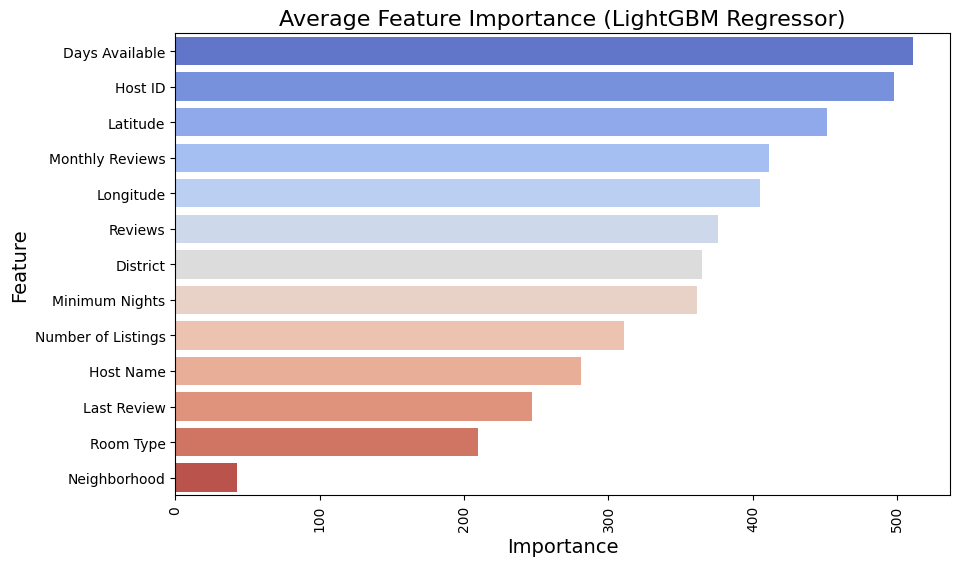

In [36]:
algorithm = LGBMRegressor(n_estimators=149, max_depth=18, learning_rate=0.11, verbose=-1)
algorithm.fit(model_features, model_classes)
plot_feature_importance(model_features.columns, model_features.columns, algorithm.feature_importances_)

In [37]:
algorithm = LGBMRegressor(n_estimators=149, max_depth=18, learning_rate=0.11, verbose=-1)
feature_selection(attributes=model_features, classes=model_classes, cv_estimator=algorithm)

Original number of features: 13
Features: ['Host ID', 'Host Name', 'Neighborhood', 'District', 'Latitude', 'Longitude', 'Room Type', 'Minimum Nights', 'Reviews', 'Last Review', 'Monthly Reviews', 'Number of Listings', 'Days Available']

Optimal number of features: 13
Best features: ['Host ID', 'Host Name', 'Neighborhood', 'District', 'Latitude', 'Longitude', 'Room Type', 'Minimum Nights', 'Reviews', 'Last Review', 'Monthly Reviews', 'Number of Listings', 'Days Available']


## **3.4. Statistical Test**

- XGBoost and LightGBM are statistically different;
- The standard deviation is a good provisory metric to analyze ML models equality (low - tends to be equal).

In [39]:
from mlxtend.evaluate import paired_ttest_5x2cv


def paired_ttest(model1, model2, attributes, classes):

    alpha = 0.05
    _, p = paired_ttest_5x2cv(model1, model2, attributes, classes)

    print(f'alpha:       {alpha}')
    print(f'p value:     {p}')

    if p > alpha:
        print('Models are statistically equal (Fail to reject null hypothesis)')
    else:
        print('Models statistically different (Reject null hypothesis)')

In [40]:
regressor1 = XGBRegressor(n_estimators=50, max_depth=6, learning_rate=0.11)
regressor2 = LGBMRegressor(n_estimators=149, max_depth=18, learning_rate=0.11, verbose=-1)

paired_ttest(regressor1, regressor2, model_features, model_classes)

alpha:       0.05
p value:     0.04299040582280115
Models statistically different (Reject null hypothesis)


# **4. Training and saving the final model**

## **Question 5**

In [43]:
import joblib

regressor1.fit(model_features, model_classes)
joblib.dump(regressor1, f'{getcwd()}/../models/xgb_model.pkl')

regressor2.fit(model_features, model_classes)
joblib.dump(regressor2, f'{getcwd()}/../models/lgbm_model.pkl')

['/content/../models/lgbm_model.pkl']

## **Question 4 - Predicting the given example**

In [48]:
apt = {
        'id': 2595,
        'nome': 'Skylit Midtown Castle',
        'host_id': 2845,
        'host_name': 'Jennifer',
        'bairro_group': 'Manhattan',
        'bairro': 'Midtown',
        'latitude': 40.75362,
        'longitude': -73.98377,
        'room_type': 'Entire home/apt',
        'price': 225,
        'minimo_noites': 1,
        'numero_de_reviews': 45,
        'ultima_review': '2019-05-21',
        'reviews_por_mes': 0.38,
        'calculado_host_listings_count': 2,
        'disponibilidade_365': 355
        }

instance = pd.DataFrame([apt])

instance = instance.rename(columns={
    'id': 'ID',
    'nome': 'Name',
    'host_id': 'Host ID',
    'host_name': 'Host Name',
    'bairro_group': 'Neighborhood',
    'bairro': 'District',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'room_type': 'Room Type',
    'price': 'Price',
    'minimo_noites': 'Minimum Nights',
    'numero_de_reviews': 'Reviews',
    'ultima_review': 'Last Review',
    'reviews_por_mes': 'Monthly Reviews',
    'calculado_host_listings_count': 'Number of Listings',
    'disponibilidade_365': "Days Available"
})

# Preprocessing
instance = instance.drop(['ID', 'Name', 'Price'], axis='columns')
for col in instance.columns.values:
    if instance[col].dtypes != int and instance[col].dtypes != float:
        instance = discretize_values(instance, col)

# Binning mapping
for feature in bins:
    binned_feature = np.digitize(instance[feature], bins[feature])
    instance[feature] = binned_feature

model = joblib.load(f'{getcwd()}/../models/lgbm_model.pkl')
prediction = model.predict(instance)
price = round(prediction[0], 2)
print(f'US$ {str(price)}')

US$ 218.75



- According with the LightGBM model, the supposed apartment was evaluated with a price of US$ 218.75;
- For a single instance, that is a reasonable prediction, since it is approximately 2,8% lower than the ground truth (225);
- In this kind of problem, predicting a little lower is a little worse than higher, since it increases loss probability. For example, on disease classification problem, a false positive is better than a false negative. Diagnosed as sick but in fact not be is better than be diagnosed as healthy and having a disease.

# **5. Future Steps**

- Deepen analysis on prices per borough and neighborhood to be able to indicate the best purchase local with satisfactory level (Question 2.a.);
- Fine tuning with more parameters and more combinations;
- Play with feature (or instance) selection to reduce dataset size, computational cost and execution time without impacting negatively on model's performance;
- Explore NLP techniques with _name_ column (possible feature engineering);
- Expand data analysis (mainly statistical) and visualization on features correlation;
- Search for state of the art algorithms and evaluate their performance;
- Consider expanding the dataset with other sources.